In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("replacemissing.csv")
df


,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-8888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [4]:
#Replacing single value

new_df = df.replace(-99999, value=np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,-8888.0,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [5]:
#Replacing multiple value

new_df = df.replace([-99999,-8888], value=np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [11]:
#Replacing per column

new_df = df.replace({
        'temperature': -99999,
        'windspeed': [-8888,-99999],
        'event': '0'
    }, np.nan)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [12]:
#Replacing by using mapping

new_df = df.replace({
        -99999: np.nan,
        'no event': 'Sunny',
    })
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,-8888.0,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [13]:
df = pd.read_csv("replacemissing.csv")
df


,day,temperature,windspeed,event
0,1/1/2017,32 F,6 mph,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7 mph,0
4,1/5/2017,32,-8888,Rain
5,1/6/2017,31 C,2,Sunny
6,1/6/2017,34,5,0


In [15]:
#Regex

# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Za-z]', 'windspeed': '[a-z]'},'', regex=True) 
new_df


,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-8888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [16]:
#Replacing list with another list

df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df


,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [17]:
df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


In [18]:
df = pd.read_csv("weather_data.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [19]:
g = df.groupby("city")   # 3 df bcz 3 cities and its data
g

In [20]:
#view the groups
#This is similar to SQL,
#SELECT * from weather_data GROUP BY city
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)

city: mumbai


data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [21]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [22]:
#What was the maximum temperature in each of these 3 cities?
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [23]:
#What was the average windspeed in each of these 3 cities?
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [ ]:
#uses split apply combine
#spilt into groups
#apply mean, max etc on each df of group
#combine the results of each group together

In [24]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [25]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [26]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [27]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

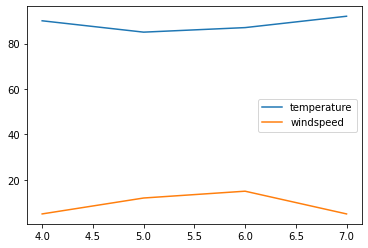

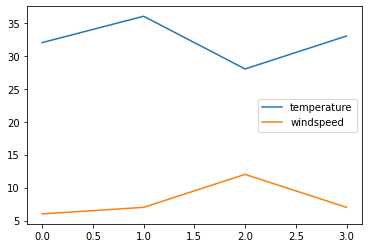

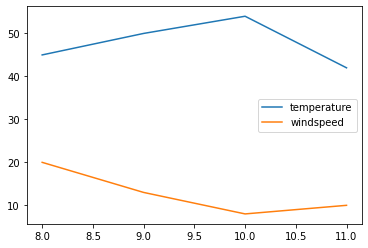

In [28]:
#charts for each group
%matplotlib inline
g.plot()

In [29]:
#Group data using custom function: Let's say you want to group your data using custom function. 
#Here the requirement is to create three groups
#Days when temperature was between 80 and 90
#Days when it was between 50 and 60
#Days when it was anything else
#For this you need to write custom grouping function and pass that to groupby

def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [30]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy


In [ ]:
#concat 2 or more df

In [31]:
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [32]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [33]:
df = pd.concat([india_weather, us_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [34]:
#Ignore Index
df = pd.concat([india_weather, us_weather], ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [35]:
#Concatenation And Keys
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [36]:
df.loc["us"]

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [37]:
df.loc["india"]

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [ ]:
#windspeed as col and not row while merging
# takes the order of cities as it it

In [38]:
temperature_df = pd.DataFrame({
    "city": ["delhi","banglore","mumbai"],
    "temperature": [32,45,30],
})
temperature_df

,city,temperature
0,delhi,32
1,banglore,45
2,mumbai,30


In [39]:
windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
})
windspeed_df

,city,windspeed
0,delhi,7
1,mumbai,12


In [40]:
df = pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,delhi,32,delhi,7.0
1,banglore,45,mumbai,12.0
2,mumbai,30,NaN,NaN


In [ ]:
#Concatenation Using Index
#keep same cities together

In [41]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [42]:
windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


In [43]:
df = pd.concat([temperature_df,windspeed_df],axis=1)   #matches with index to align rows from differnet df
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


In [44]:
#Concatenate dataframe with series
s = pd.Series(["Humid","Dry","Rain"], name="event")
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [45]:
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [46]:
df = pd.concat([temperature_df,s],axis=1)
df

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


In [ ]:
#merge
#used to avoid giving index on concat

In [47]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [48]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [49]:
df3 = pd.merge(df1, df2, on="city")   #on is the col on which merge is performed
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [50]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando","san francisco"],
    "temperature": [21,14,35,32],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,san francisco,32


In [51]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","texas"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,texas,75


In [52]:
#here intersection is performed so only common cities in both df is shown
#inner join
df3 = pd.merge(df1, df2, on="city")   #on is the col on which merge is performed
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [ ]:
#Type Of DataBase Joins

In [53]:
df3=pd.merge(df1,df2,on="city",how="inner")  #intersection
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [54]:
df3=pd.merge(df1,df2,on="city",how="outer")  #union
df3

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,san francisco,32.0,NaN
4,texas,NaN,75.0


In [55]:
df3=pd.merge(df1,df2,on="city",how="left")
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,san francisco,32,NaN


In [56]:
df3=pd.merge(df1,df2,on="city",how="right")
df3

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,texas,NaN,75


In [57]:
#indicator flag
#additional merge col to tell where the data came from
df3=pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,san francisco,32.0,NaN,left_only
4,texas,NaN,75.0,right_only


In [58]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1


,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [59]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2


,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [60]:
#default suffixes _x and _y
df3= pd.merge(df1,df2,on="city")
df3

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21,65,14,68
1,chicago,14,68,21,65


In [61]:
#suffixes
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


In [62]:
#join
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1.set_index('city',inplace=True)
df1

,temperature
city,
new york,21
chicago,14
orlando,35


In [63]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2.set_index('city',inplace=True)
df2

,humidity
city,
chicago,65
new york,68
orlando,75


In [64]:
df1.join(df2,lsuffix='_l', rsuffix='_r')

,temperature,humidity
city,,
new york,21,68
chicago,14,65
orlando,35,75


In [ ]:
#pivot

In [3]:
df = pd.read_csv("pivot.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [4]:
df.pivot(index='city',columns='date')  #index is row col is col

temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60

In [5]:
df.pivot(index='city',columns='date',values="humidity")  #instead of temp only want humidity

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


In [6]:
df.pivot(index='date',columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [7]:
df.pivot(index='humidity',columns='city')

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017       NaN       NaN        80.0    NaN      NaN
30        5/2/2017       NaN       NaN        77.0    NaN      NaN
35        5/3/2017       NaN       NaN        79.0    NaN      NaN
56             NaN       NaN  5/1/2017         NaN    NaN     65.0
58             NaN       NaN  5/2/2017         NaN    NaN     66.0
60             NaN       NaN  5/3/2017         NaN    NaN     68.0
80             NaN  5/1/2017       NaN         NaN   75.0      NaN
83             NaN  5/2/2017       NaN         NaN   78.0      NaN
85             NaN  5/3/2017       NaN         NaN   82.0      NaN

In [8]:
#Pivot Table
df = pd.read_csv("pivot1.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [9]:
df.pivot_table(index="city",columns="date")   #gives avg data

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

In [10]:
#aggregate func 
df.pivot_table(index="city",columns="date", aggfunc="sum")

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai        163      111         153      162
new york      110      122         126      142

In [11]:
df.pivot_table(index="city",columns="date", aggfunc="count")

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai          2        2           2        2
new york        2        2           2        2

In [12]:
df.pivot_table(index="city",columns="date", aggfunc="diff")

,humidity,temperature
1,-2,-4
3,2,2
5,3,3
7,-59,-2


In [13]:
df.pivot_table(index="city",columns="date", aggfunc="mean")

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

In [14]:
#Margins
#adds all col row which gives aggregate
df.pivot_table(index="city",columns="date", margins=True,aggfunc=np.sum)

humidity               temperature              
date     5/1/2017 5/2/2017  All    5/1/2017 5/2/2017  All
city                                                     
mumbai        163      111  274         153      162  315
new york      110      122  232         126      142  268
All           273      233  506         279      304  583

In [15]:
df = pd.read_csv("pivot2.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [16]:
#convert str to date
df['date'] = pd.to_datetime(df['date'])

In [17]:
#Grouper
#avg temp humidity in the given month 
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')    #freq has lot of options
                                                                        # here M stands for month 
                                                                        # key is the col on which u want the grouper

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


In [ ]:
#reshape with melt

In [18]:
df = pd.read_csv("melt.csv")
df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [19]:
df1 = pd.melt(df, id_vars=["day"])
df1

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [21]:
df1[df1["variable"]=="berlin"]

,day,variable,value
14,Monday,berlin,41
15,Tuesday,berlin,43
16,Wednesday,berlin,45
17,Thursday,berlin,38
18,Friday,berlin,30
19,Saturday,berlin,45
20,Sunday,berlin,47


In [22]:
melted = pd.melt(df, id_vars=["day"], var_name='city', value_name='temperature')  #id var is x axis var that dont want to transform
melted                                                                          #to change col name of var and value use var_anme and value_name

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [ ]:
#stacking and unstacking data
#changing col to row and vice versa for analysis

In [23]:
df = pd.read_excel("stocks.xlsx",header=[0,1])    #header is 2 rows price and company row so 0,1
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

In [24]:
df.stack()   #innermost header converted to row

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [25]:
df.stack(level=0)     #first header converted to row

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

In [26]:
df_stacked=df.stack()
df_stacked

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [27]:
#unstacking
df_stacked.unstack()

Price                            Price to earnings ratio (P/E)           \
  Company Facebook  Google Microsoft                       Company Facebook   
0     NaN    155.0   955.0      66.0                           NaN    37.10   
1     NaN    150.0   987.0      69.0                           NaN    36.98   
2     NaN    153.0   963.0      62.0                           NaN    36.78   
3     NaN    155.0  1000.0      61.0                           NaN    36.11   
4     NaN    156.0  1012.0      66.0                           NaN    37.07   

                   Unnamed: 0_level_0                            
  Google Microsoft            Company Facebook Google Microsoft  
0   32.0     30.31         2017-06-05      NaT    NaT       NaT  
1   31.3     30.56         2017-06-06      NaT    NaT       NaT  
2   31.7     30.46         2017-06-07      NaT    NaT       NaT  
3   31.2     30.11         2017-06-08      NaT    NaT       NaT  
4   30.0     31.00         2017-06-09      NaT    NaT       NaT

In [28]:
#3 levels of column headers
df2 = pd.read_excel("stocks_3_headers.xlsx",header=[0,1,2])
df2

Unnamed: 0_level_0 Price Ratios                   \
  Unnamed: 0_level_1        Price                    
             Company     Facebook Google Microsoft   
0            Q1 2016          155    955        66   
1            Q2 2016          150    987        69   
2            Q3 2016          153    963        62   
3            Q4 2016          155   1000        61   
4            Q1 2017          156   1012        66   

                                                 Income Statement         \
  Price to earnings ratio (P/E)                         Net Sales          
                       Facebook Google Microsoft         Facebook Google   
0                         37.10   32.0     30.31              2.6     20   
1                         36.98   31.3     30.56              3.1     22   
2                         36.78   31.7     30.46              4.3     24   
3                         36.11   31.2     30.11              6.7     26   
4                         37.07   30.0     31.00              8.1     31   

                                         
            Net Profit                   
  Microsoft   Facebook Google Microsoft  
0     18.70       0.80   5.43      4.56  
1     21.30       0.97   5.89      5.10  
2     21.45       1.20   6.10      5.43  
3     21.88       1.67   6.50      5.89  
4     22.34       2.03   6.40      6.09

In [29]:
df2.stack()

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN

In [30]:
df2.stack(level=0)

Net Profit                  Net Sales                   \
                       Facebook Google Microsoft  Facebook Google Microsoft   
0 Income Statement         0.80   5.43      4.56       2.6   20.0     18.70   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
1 Income Statement         0.97   5.89      5.10       3.1   22.0     21.30   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
2 Income Statement         1.20   6.10      5.43       4.3   24.0     21.45   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
3 Income Statement         1.67   6.50      5.89       6.7   26.0     21.88   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
4 Income Statement         2.03   6.40      6.09       8.1   31.0     22.34   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   

                        Price                   Price to earnings ratio (P/E)  \
                     Facebook  Google Microsoft                      Facebook   
0 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0   955.0      66.0                         37.10   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
1 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          150.0   987.0      69.0                         36.98   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
2 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          153.0   963.0      62.0                         36.78   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
3 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0  1000.0      61.0                         36.11   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
4 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          156.0  1012.0      66.0                         37.07   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   

                                      Unnamed: 0_level_1  
                     Google Microsoft            Company  
0 Income Statement      NaN       NaN                NaN  
  Price Ratios         32.0     30.31                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2016  
1 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.3     30.56                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q2 2016  
2 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.7     30.46                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q3 2016  
3 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.2     30.11                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q4 2016  
4 Income Statement      NaN       NaN                NaN  
  Price Ratios         30.0     31.00                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2017

In [31]:
df2.stack(level=1)

Income Statement                   \
                                        Facebook Google Microsoft   
0 Net Profit                                0.80   5.43      4.56   
  Net Sales                                 2.60  20.00     18.70   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
1 Net Profit                                0.97   5.89      5.10   
  Net Sales                                 3.10  22.00     21.30   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
2 Net Profit                                1.20   6.10      5.43   
  Net Sales                                 4.30  24.00     21.45   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
3 Net Profit                                1.67   6.50      5.89   
  Net Sales                                 6.70  26.00     21.88   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
4 Net Profit                                2.03   6.40      6.09   
  Net Sales                                 8.10  31.00     22.34   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   

                                Price Ratios                    \
                                    Facebook  Google Microsoft   
0 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00   955.0     66.00   
  Price to earnings ratio (P/E)        37.10    32.0     30.31   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
1 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               150.00   987.0     69.00   
  Price to earnings ratio (P/E)        36.98    31.3     30.56   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
2 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               153.00   963.0     62.00   
  Price to earnings ratio (P/E)        36.78    31.7     30.46   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
3 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00  1000.0     61.00   
  Price to earnings ratio (P/E)        36.11    31.2     30.11   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
4 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               156.00  1012.0     66.00   
  Price to earnings ratio (P/E)        37.07    30.0     31.00   
  Unnamed: 0_level_1                     NaN     NaN       NaN   

                                Unnamed: 0_level_0  
                                           Company  
0 Net Profit                                   NaN  
  Net Sales                                    NaN  
  Price                                        NaN  
  Price to earnings ratio (P/E)                NaN  
  Unnamed: 0_level_1                       Q1 2016  
1 Net Profit  

In [ ]:
#cross tab
#contigency table

#shows freq of 2 varibles/cols
#freq distribution table

In [33]:
df = pd.read_excel("survey.xlsx")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [34]:
pd.crosstab(df.Nationality,df.Handedness)   #pd.crosstab(row level,col level)
                                            #pd.crosstab(x axis,y axis)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [35]:
pd.crosstab(df.Sex,df.Handedness)

Handedness,Left,Right
Sex,,
Female,2,3
Male,5,2


In [36]:
#Margins
#adds all cols that gives sum
pd.crosstab(df.Sex,df.Handedness, margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


In [37]:
#Multi Index Column and Rows
pd.crosstab(df.Sex, [df.Handedness,df.Nationality], margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [38]:
pd.crosstab([df.Nationality, df.Sex], df.Handedness, margins=True)

Handedness          Left  Right  All
Nationality Sex                     
Bangadesh   Female     1      0    1
            Male       1      0    1
China       Female     1      1    2
            Male       1      0    1
India       Male       2      1    3
USA         Female     0      2    2
            Male       1      1    2
All                    7      5   12

In [39]:
#Normalize
#index for getting percentage
pd.crosstab(df.Sex, df.Handedness, normalize='index')

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


In [40]:
#Aggfunc and Values
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


In [ ]:
#date time index

In [42]:
df = pd.read_csv("datetime.csv")
df.head(5)

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [44]:
type(df["Date"][0])

str

In [45]:
df = pd.read_csv("datetime.csv",parse_dates=["Date"])  #changes date col type from str to date
df.head(5)

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


In [46]:
type(df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
df = pd.read_csv("datetime.csv",parse_dates=["Date"], index_col="Date")  #change date to index col instead of integer
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782


In [48]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [ ]:
#What is DatetimeIndex? Benefits of it

In [49]:
#(1) Partial Date Index: Select Specific Months Data
df['2017-06-30']

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/1230328848.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-06-30']


,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [50]:
df["2017-01"]

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/3632472639.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2017-01"]


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [51]:
df['2017-06'].head() 

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/3188288194.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-06'].head()


,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-06-29,144.71,145.13,142.28,143.68,31499368
2017-06-28,144.49,146.11,143.16,145.83,22082432
2017-06-27,145.01,146.16,143.62,143.73,24761891
2017-06-26,147.17,148.28,145.38,145.82,25692361


In [52]:
df['2017-06'].Close.head(4)   #closing price on each date

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/1958664865.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-06'].Close.head(4)


Date
2017-06-30    144.02
2017-06-29    143.68
2017-06-28    145.83
2017-06-27    143.73
Name: Close, dtype: float64

In [53]:
#Average price of aapl's stock in June, 2017
df['2017-06'].Close.mean()

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/786363034.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-06'].Close.mean()


147.8313636363636

In [54]:
df['2017'].head(2) 

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/1799195107.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017'].head(2)


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782


In [59]:
#(2) Select Date Range
df['2017-07-01':'2017-07-10']

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/2259373675.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df['2017-07-01':'2017-07-10']


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848


In [60]:
df['2017-01']

C:\Users\10676874\AppData\Local\Temp/ipykernel_7892/1372776413.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-01']


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [61]:
#Resampling
#for close col resample monthly freq wise stock of mean data
df['Close'].resample('M').mean().head()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
Freq: M, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

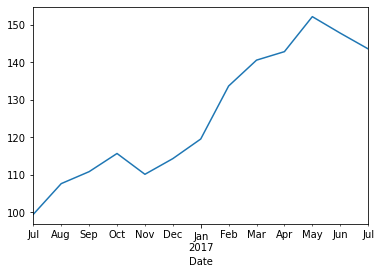

In [62]:
%matplotlib inline
df['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

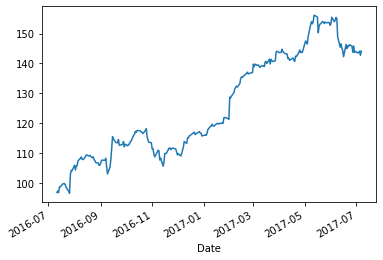

In [66]:
#just for close stock on daily basis graph
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

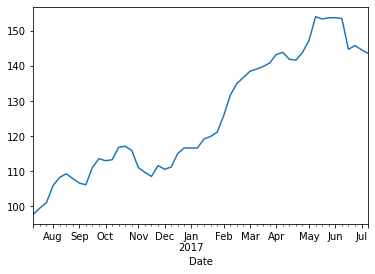

In [63]:
df['Close'].resample('W').mean().plot()   #resampled weekly stocks

<AxesSubplot:xlabel='Date'>

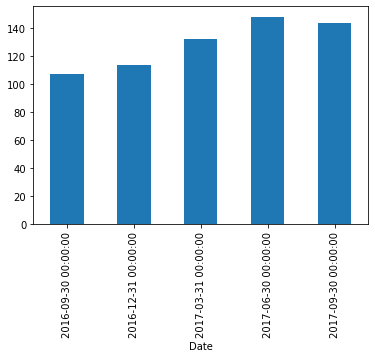

In [65]:
df['Close'].resample('Q').mean().plot(kind='bar') #resampled quaterly stocks with bar chart

In [ ]:
#datetime index

In [67]:
df = pd.read_csv("nodates.csv")  #has nodates col
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [68]:
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B')   #adding the date range acc to freq as business days
rng

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [69]:
df.set_index(rng, inplace=True)
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


In [70]:
df["2016-06-01":"2016-06-10"].Close.mean()    #date range close col mean

152.72125

In [71]:
df.asfreq('D',method="pad")  #used to add weekends bcz of D and method is pad means what was previous days stock take that

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-04,154.34,154.45,153.46,153.93,25331662
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


In [72]:
df.asfreq('W',method="pad")   #weekly

,Open,High,Low,Close,Volume
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-12,145.74,146.09,142.51,145.42,72307330
2016-06-19,143.66,146.74,143.66,146.34,32541404
2016-06-26,147.17,148.28,145.38,145.82,25692361


In [73]:
df.asfreq('H',method="pad")  #hourly
df.head(5)

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


In [75]:
#Finding missing dates from datetimeindex
daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
daily_index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
               '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='D')

In [74]:
#find missing dates if end date not know but know how many dates we want
dindex = pd.date_range(start="6/1/2016",periods=70,freq='B')   #gives 70 dates from start of business days
dindex

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30', '2016-07-01', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14',
               '2016-07-15', '2016-07-18', '2016-07-19', '2016-07-20',
               '2016-07-21', '2016-07-22', '2016-07-25', '2016-07-26',
               '2016-07-27', '2016-07-28', '2016-07-29', '2016-08-01',
               '2016-08-02', '2016-08-03', '2016-08-04', '2016-08-05',
               '2016-08-08', '2016-08-09', '2016-08-10', '2016-08-11',
               '2016-08-12', '2016-08-15', '2016-08-16', '2016-08-17',
      

In [76]:
daily_index.difference(df.index)

DatetimeIndex(['2016-06-04', '2016-06-05', '2016-06-11', '2016-06-12',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-06-26'],
              dtype='datetime64[ns]', freq=None)

<AxesSubplot:>

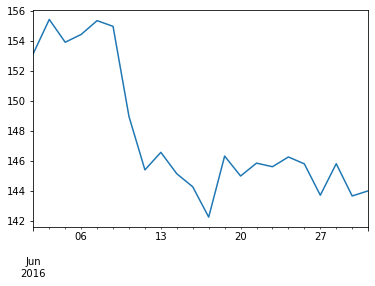

In [77]:
#Benefits of having DatetimeIndex
%matplotlib inline
df.Close.plot()

In [78]:
df["2016-06-01":"2016-06-10"].Close.mean()

152.72125

In [79]:
#asfreq
df.index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [80]:
df.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-04,154.34,154.45,153.46,153.93,25331662
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


In [81]:
df.asfreq('W',method='pad')

,Open,High,Low,Close,Volume
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-12,145.74,146.09,142.51,145.42,72307330
2016-06-19,143.66,146.74,143.66,146.34,32541404
2016-06-26,147.17,148.28,145.38,145.82,25692361


In [82]:
df.asfreq('H',method='pad')

,Open,High,Low,Close,Volume
2016-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
...,...,...,...,...,...
2016-06-29 20:00:00,144.71,145.13,142.28,143.68,31499368
2016-06-29 21:00:00,144.71,145.13,142.28,143.68,31499368
2016-06-29 22:00:00,144.71,145.13,142.28,143.68,31499368
2016-06-29 23:00:00,144.71,145.13,142.28,143.68,31499368


In [83]:
#generating DatetimeIndex with periods argument
rng = pd.date_range('1/1/2011', periods=72, freq='H')
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               '2011-01-02 00:00:00', '2011-01-02 01:00:00',
               '2011-01-02 02:00:00', '2011-01-02 03:00:00',
               '2011-01-02 04:00:00', '2011-01-02 05:00:00',
               '2011-01-02 06:00:00', '2011-01-02 07:00:00',
               '2011-01-

In [84]:
import numpy as np
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
ts.head(20)

2011-01-01 00:00:00    5
2011-01-01 01:00:00    4
2011-01-01 02:00:00    3
2011-01-01 03:00:00    2
2011-01-01 04:00:00    9
2011-01-01 05:00:00    3
2011-01-01 06:00:00    8
2011-01-01 07:00:00    8
2011-01-01 08:00:00    1
2011-01-01 09:00:00    6
2011-01-01 10:00:00    5
2011-01-01 11:00:00    2
2011-01-01 12:00:00    1
2011-01-01 13:00:00    7
2011-01-01 14:00:00    7
2011-01-01 15:00:00    8
2011-01-01 16:00:00    9
2011-01-01 17:00:00    5
2011-01-01 18:00:00    0
2011-01-01 19:00:00    2
Freq: H, dtype: int32